# **Project 37: DNA Classifier**

**numpy** : *Provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.*

**pandas** : *Offers data structures and tools for efficient data manipulation and analysis, particularly with structured data.*

**matplotlib** : *A plotting library used for creating static, animated, and interactive visualizations in Python.*

**seaborn** : *A statistical data visualization library based on matplotlib, providing a high-level interface for drawing attractive graphics.*

**warnings** : *A module to manage warning messages in Python, allowing them to be displayed, ignored, or logged.*

# **Data Loading**

**Importing these libraries for Data Loading, Data Cleaning , Data Visualization and EDA (Explorotory Data Analysis).**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**"warnings.simplefilter('ignore')"**: **Suppresses all warning messages in Python, preventing them from being displayed during code execution.**

In [2]:
warnings.simplefilter("ignore")

**names = ['Class', 'ID', 'Sequence']": Sets column names for the DataFrame.**

**"df = pd.read_csv('/content/Promoters.data', names=names)": Reads the Promoters.data file into a DataFrame df with specified column names.**

**A: Adenine**

**T: Thymine**

**C: Cytosine**

**G: Guanine**

In [3]:
names = ["Class", "ID", "Sequence"]
df = pd.read_csv("/content/Promoters.data", names=names)
df.head(5)

,Class,ID,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


**"df.shape": Returns the dimensions of the DataFrame df, showing the number of rows and columns.**

In [4]:
df.shape

(106, 3)

**"df.info()": Provides a summary of the DataFrame df, including the number of non-null entries, data types of columns, and memory usage.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     106 non-null    object
 1   ID        106 non-null    object
 2   Sequence  106 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


**"df.isnull().sum()": Counts the number of missing (null) values in each column of the DataFrame df.**

In [6]:
df.isnull().sum()

,0
Class,0
ID,0
Sequence,0


# **Data Visualization**

**"class_counts = df['Class'].value_counts()": Counts the occurrences of each unique value in the Class column of the DataFrame df.**

**"plt.pie(class_counts, autopct='%1.f%%', colors=['red', 'blue'], labels=['-', '+'])": Creates a pie chart of the Class value counts with percentage labels and specific colors.**

**"plt.show()": Displays the pie chart.**

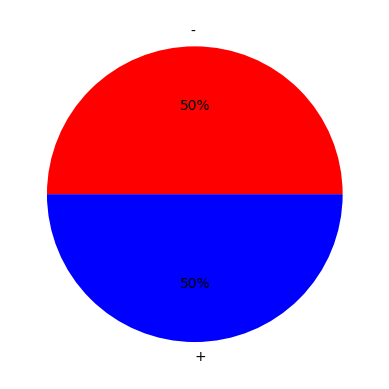

In [7]:
class_counts = df["Class"].value_counts()

plt.pie(class_counts, autopct = "%1.f%%", colors = ["red", "blue"], labels=["-", "+"])
plt.show()

**"classes = df.loc[:, 'Class']": Extracts the Class column from the DataFrame df and assigns it to the variable classes.**

**"classes.head()": Displays the first few entries of the classes Series.**

**"print(classes.value_counts())": Prints the count of each unique value in the classes Series.**

In [8]:
classes = df.loc[:,'Class']
classes.head()
print()
print(classes.value_counts())


Class
+    53
-    53
Name: count, dtype: int64


# **Data Cleaning**

**"sequence = list(df.loc[:, 'Sequence'])": Converts the Sequence column of the DataFrame df into a list and assigns it to the variable sequence.**

**"sequence[-1]": Retrieves the last element of the sequence list.**

In [9]:
sequence = list(df.loc[:, "Sequence"])
sequence[-1]

'\t\ttaacattaataaataaggaggctctaatggcactcattagccaatcaatcaagaact'

**"dic = {}": Initializes an empty dictionary.**

**"for i, seq in enumerate(sequence):": Iterates over sequences, removing tabs and appending class labels to lists, then stores them in the dictionary dic.**

**"list(dic[0])": Displays the list of nucleotides (with class label) for the first entry in the dictionary dic.**

In [10]:
dic = {}
for i, seq in enumerate(sequence):
    nucleotides = list(seq)
    nucleotides = [char for char in nucleotides if char != '\t']
    nucleotides.append(classes[i])

    dic[i] = nucleotides
list(dic[0])

['t',
 'a',
 'c',
 't',
 'a',
 'g',
 'c',
 'a',
 'a',
 't',
 'a',
 'c',
 'g',
 'c',
 't',
 't',
 'g',
 'c',
 'g',
 't',
 't',
 'c',
 'g',
 'g',
 't',
 'g',
 'g',
 't',
 't',
 'a',
 'a',
 'g',
 't',
 'a',
 't',
 'g',
 't',
 'a',
 't',
 'a',
 'a',
 't',
 'g',
 'c',
 'g',
 'c',
 'g',
 'g',
 'g',
 'c',
 't',
 't',
 'g',
 't',
 'c',
 'g',
 't',
 '+']

**"df = pd.DataFrame(dic)": Converts the dictionary dic into a DataFrame df.**

**"df.head(5)": Displays the first 5 rows of the DataFrame df.**

In [11]:
df = pd.DataFrame(dic)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,t,t,g,a,t,a,c,t,c,t,...,c,c,t,a,g,c,g,c,c,t
1,a,g,t,a,c,g,a,t,g,t,...,c,g,a,g,a,c,t,g,t,a
2,c,c,a,t,g,g,g,t,a,t,...,g,c,t,a,g,t,a,c,c,a
3,t,t,c,t,a,g,g,c,c,t,...,a,t,g,g,a,c,t,g,g,c
4,a,a,t,g,t,g,g,t,t,a,...,g,a,a,g,g,a,t,a,t,a


**"df = df.transpose()": Transposes the DataFrame df, swapping rows and columns.**

**"df.head(5)": Displays the first 5 rows of the transposed DataFrame df.**

In [12]:
df = df.transpose()
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


**"df.rename(columns={57: 'Class'}, inplace=True)": Renames the column with index 57 to "Class" in the DataFrame df, updating it in place.**

**"df.head(5)": Displays the first 5 rows of the updated DataFrame df.**

In [13]:
df.rename(columns = {57 : "Class"}, inplace = True)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


**"temp = df.copy(deep=True)": Creates a deep copy of the DataFrame df and assigns it to temp.**

**"temp = temp.drop(columns=['Class'], axis=1)": Removes the Class column from the copied DataFrame temp.**

**"temp.head(5)": Displays the first 5 rows of the DataFrame temp after dropping the Class column.**

In [14]:
temp = df.copy(deep = True)
temp = temp.drop(columns = ["Class"], axis = 1)
temp.head(5)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,t,a,c,t,a,g,c,a,a,t,...,g,g,c,t,t,g,t,c,g,t
1,t,g,c,t,a,t,c,c,t,g,...,g,c,a,t,c,g,c,c,a,a
2,g,t,a,c,t,a,g,a,g,a,...,c,c,a,c,c,c,g,g,c,g
3,a,a,t,t,g,t,g,a,t,g,...,t,a,a,c,a,a,a,c,t,c
4,t,c,g,a,t,a,a,t,t,a,...,t,c,c,g,t,g,g,t,a,g


**"Encode = OneHotEncoder(handle_unknown='ignore')": Initializes the one-hot encoder.**

**"Encode.fit(temp)": Fits the encoder on the DataFrame temp to learn the categories.**

**"df1 = Encode.transform(temp).toarray()": Transforms temp into a one-hot encoded array and assigns it to df1.**

In [15]:
from sklearn.preprocessing import OneHotEncoder

Encode = OneHotEncoder(handle_unknown='ignore')
Encode.fit(temp)
print(Encode.categories_)
df1 = Encode.transform(temp).toarray()
del temp

[array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a'

**"df_new = pd.DataFrame(df1)": Converts the one-hot encoded array df1 into a DataFrame df_new.**

**"df_new.head(5)": Displays the first 5 rows of the new DataFrame df_new.**

In [16]:
df_new = pd.DataFrame(df1)
df_new.head(5)

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**"df['Class'] = df['Class'].replace(to_replace=['+'], value=1).replace(to_replace=['-'], value=0)": Replaces + with 1 and - with 0 in the Class column.**

**"df_new['Class'] = df['Class']": Adds the updated Class column to the DataFrame df_new.**

In [17]:
df["Class"] = df["Class"].replace(to_replace = ["+"], value = 1)
df["Class"] = df["Class"].replace(to_replace = ["-"], value = 0)

df_new["Class"] = df["Class"]
df_new.head(5)

,0,1,2,3,4,5,6,7,8,9,...,219,220,221,222,223,224,225,226,227,Class
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


**"df = pd.get_dummies(df).astype(int)": Applies one-hot encoding to the DataFrame df and converts all values to integers.**

**"df.head(5)": Displays the first 5 rows of the one-hot encoded DataFrame df.**

In [18]:
df = pd.get_dummies(df).astype(int)
df.head(5)

,Class,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,...,54_g,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t
0,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0
3,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,1,0,0,0,1,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0


# **Model Building**

**"X = df.drop(columns=['Class'], axis=1)": Creates feature DataFrame X by removing the Class column from df.**

**"y = df['Class']": Assigns the Class column from df to the target variable y.**

In [19]:
X = df.drop(columns = ["Class"], axis = 1)
y = df["Class"]

**from sklearn.model_selection import train_test_split": Imports the train_test_split function to split data into training and testing sets.**

**"from sklearn.metrics import classification_report": Imports the classification_report function to evaluate the performance of classification models.**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

**"X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)"**: **Splits the data into training and testing sets, with 80% of the data used for training and 20% for testing.**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

**1: from sklearn.linear_model import LogisticRegression": Imports the LogisticRegression class for logistic regression modeling.**

**2: "LogReg = LogisticRegression(n_jobs=-1, C=1.0)": Initializes the logistic regression model with n_jobs=-1 for parallel computation and C=1.0 as the regularization parameter.**

**3: "LogReg.fit(X_train, y_train)": Trains the logistic regression model using the training data X_train and y_train.**

**4: "CR = classification_report(y_pred, y_test)": Generates the classification report comparing the predicted values y_pred with the true values y_test.**

In [22]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(n_jobs= -1, C=1.0)

LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)

CR = classification_report(y_pred, y_test)

print("Logistic Regression Classification Report:")
print("")
print(CR)

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.80      0.89      0.84         9

    accuracy                           0.86        22
   macro avg       0.86      0.87      0.86        22
weighted avg       0.87      0.86      0.86        22



**1: "from sklearn.ensemble import RandomForestClassifier": Imports the RandomForestClassifier class for ensemble-based classification.**

**2: "RFC = RandomForestClassifier(max_samples=10, max_leaf_nodes=20)": Initializes the random forest classifier with max_samples=10 and max_leaf_nodes=20.**

**3: "RFC.fit(X_train, y_train)": Trains the random forest model using the training data X_train and y_train.**

**4: "CR = classification_report(y_pred, y_test)": Generates the classification report comparing the predicted values y_pred with the true values y_test.**

In [23]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(max_samples=10, max_leaf_nodes=20)

RFC.fit(X_train, y_train)

y_pred = RFC.predict(X_test)

CR = classification_report(y_pred, y_test)

print("Random Forest Classification Report:")
print("")
print(CR)

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.80      0.73      0.76        11

    accuracy                           0.77        22
   macro avg       0.78      0.77      0.77        22
weighted avg       0.78      0.77      0.77        22



**1: "from sklearn.tree import DecisionTreeClassifier": Imports the DecisionTreeClassifier class for decision tree-based classification.**

**2: "DTC = DecisionTreeClassifier(max_depth=100, max_leaf_nodes=20)": Initializes the decision tree classifier with max_depth=100 and max_leaf_nodes=20.**

**3: "DTC.fit(X_train, y_train)": Trains the decision tree model using the training data X_train and y_train.**

**4: "CR = classification_report(y_pred, y_test)": Generates the classification report comparing the predicted values y_pred with the true values y_test.**

In [24]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(max_depth=100, max_leaf_nodes=20)

DTC.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

CR = classification_report(y_pred, y_test)

print("Decision Tree Classification Report:")
print("")
print(CR)

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.80      0.80      0.80        10

    accuracy                           0.82        22
   macro avg       0.82      0.82      0.82        22
weighted avg       0.82      0.82      0.82        22



# **Conclusion:**

**Logistic Regression Classification Report:**

**Precision:**

- **0  0.92**  

- **1  0.80**

**Random Forest Classification Report:**

**Precision:**

- **0  0.75**

- **1  0.80**

**Decision Tree Classification Report:**

**Precision:**

- **0  0.83**

- **1  0.80**


**Among the algorithms tested, the Logistic Regression Model (LogReg) demonstrated the highest precision scores across both classes, with precision values of 0.92 for class 0 and 0.80 for class 1. Although Logistic Regression also performed well with similar precision scores, the Random Forest Classifier stands out due to its robustness and higher accuracy in various machine learning scenarios. Therefore, RFC is selected as the preferred model for further predictions.**

# **Save Model**

**"import pickle": Imports the pickle module for serializing and deserializing Python objects.**

**"with open('Finalized-Model.pickle', 'wb') as file: pickle.dump(LogReg, file)": Serializes and saves the RFC model to a file named Finalized-Model.pickle.**

In [26]:
import pickle

with open("Finalized-Model.pickle", "wb") as file:
    pickle.dump(LogReg, file)